In [16]:
import sys
import importlib
sys.path.append("C:/Users/joeto/stage/stage_new/final")

import utils
importlib.reload(utils)
from utils import *

import files
importlib.reload(files)
from files import *

In [80]:
"""
Décomposition des données de consommation de chauffage (heat) et de refroidissement (cooling)
pour chaque ville sur une période de 24 heures, en créant des DataFrames séparés pour chaque cas.
ex:consommation_heat_agen
"""

for city, path in files.items():
      globals()[f"consommation_heat_{city}"] = extract_columns(files[city])

for city2, path2 in files.items():
      globals()[f"consommation_cool_{city2}"] = extract_columns(files[city2],5)    

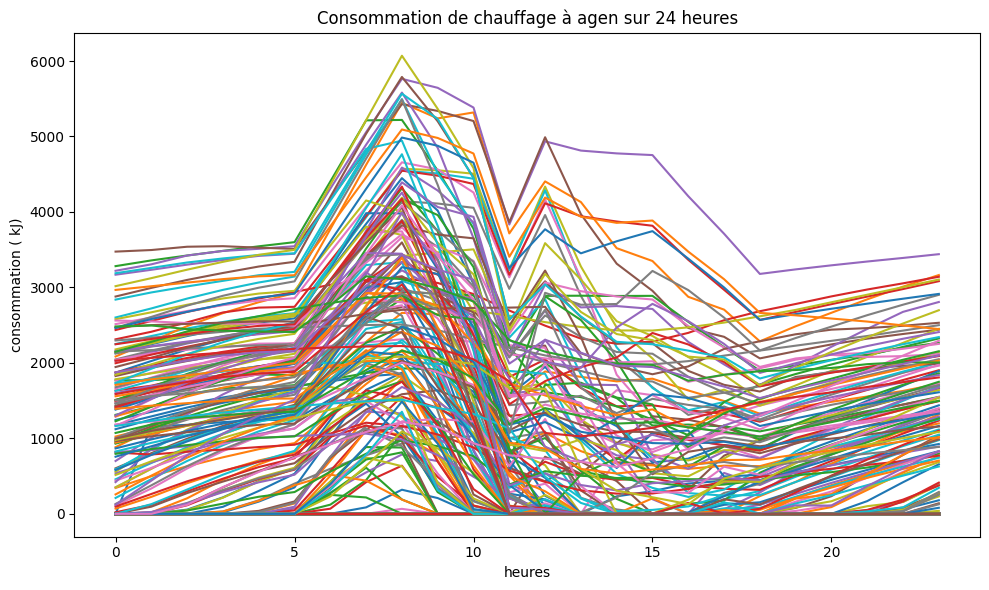

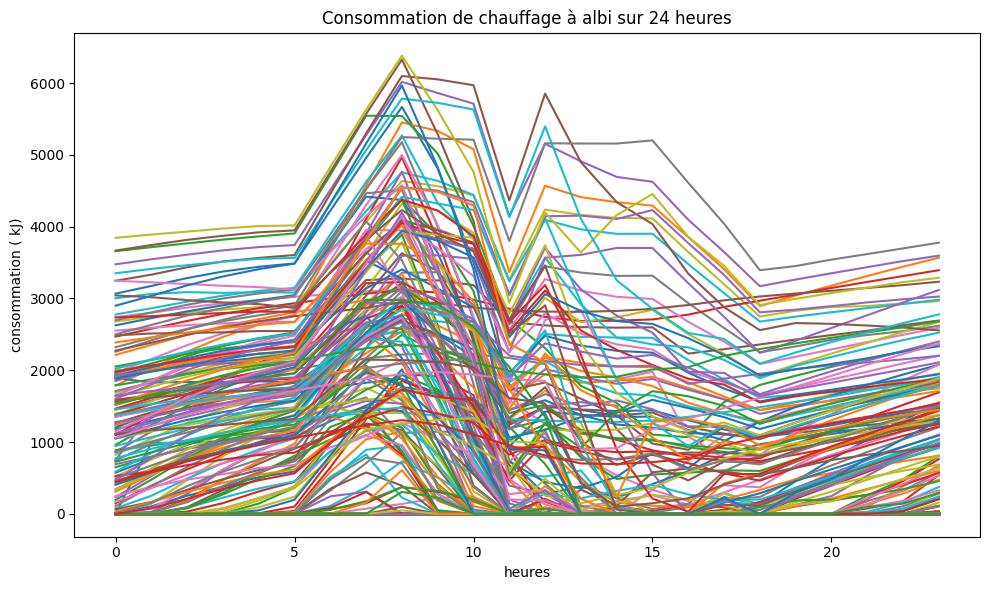

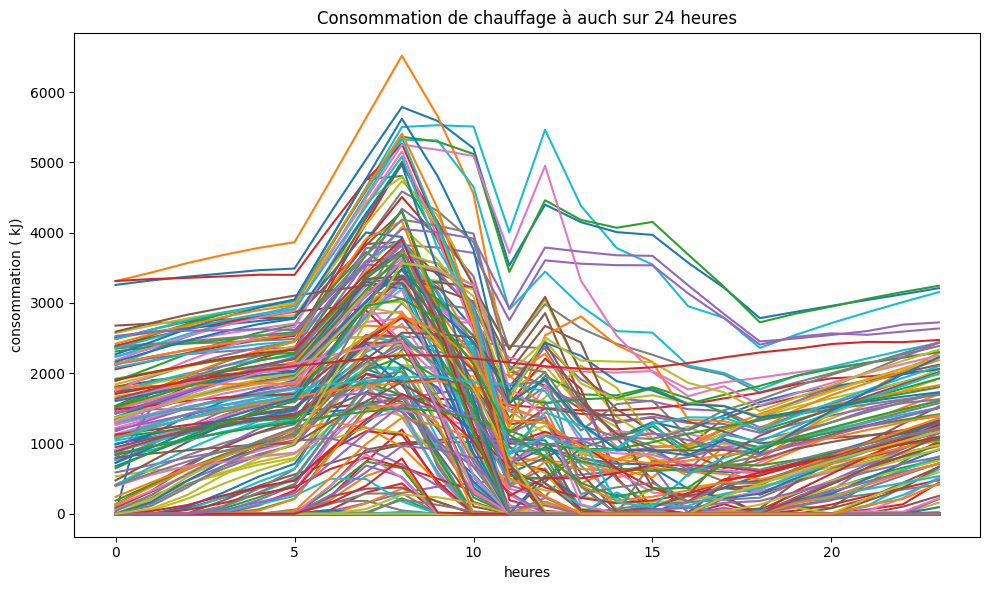

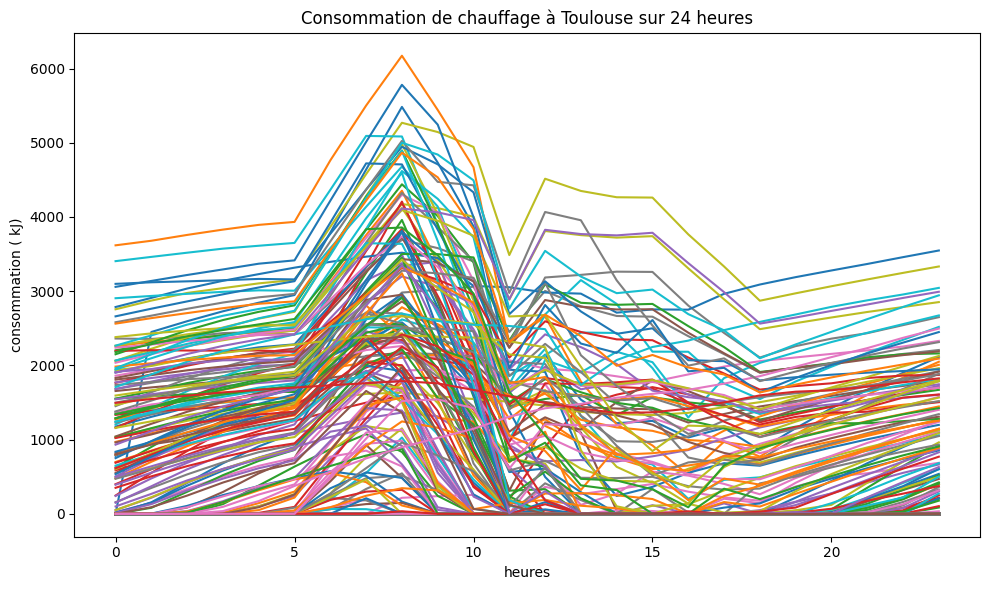

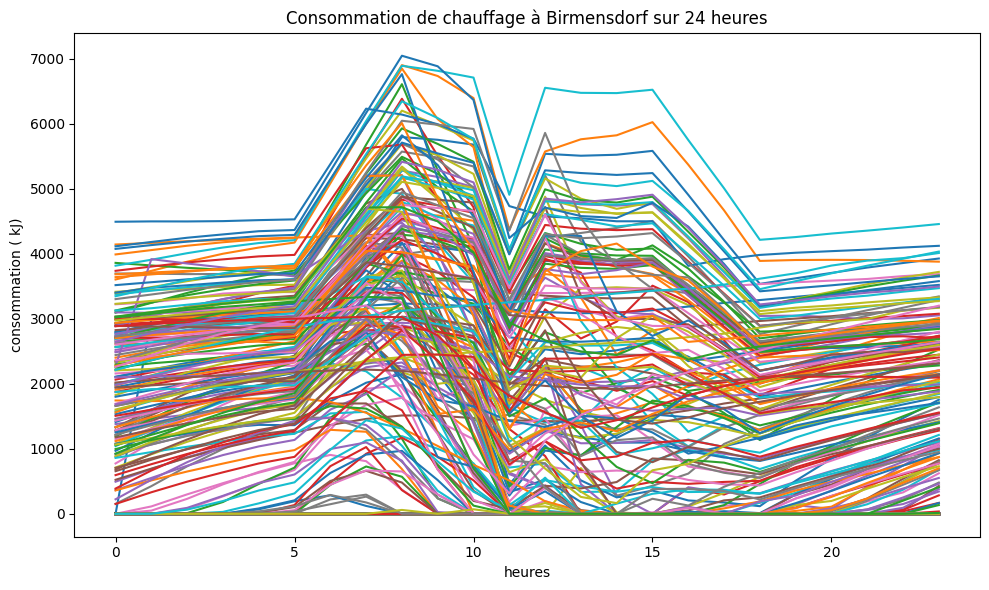

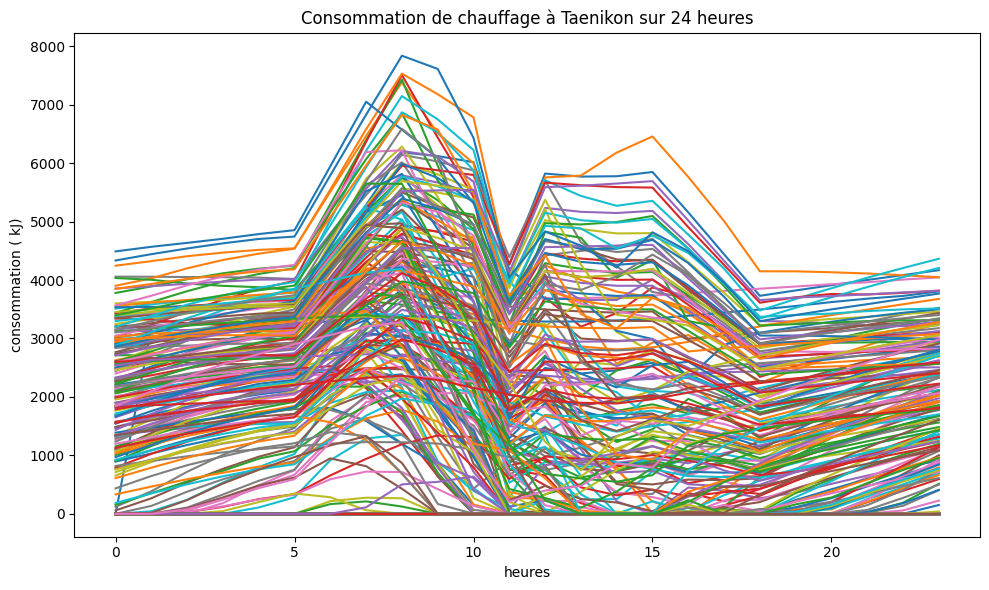

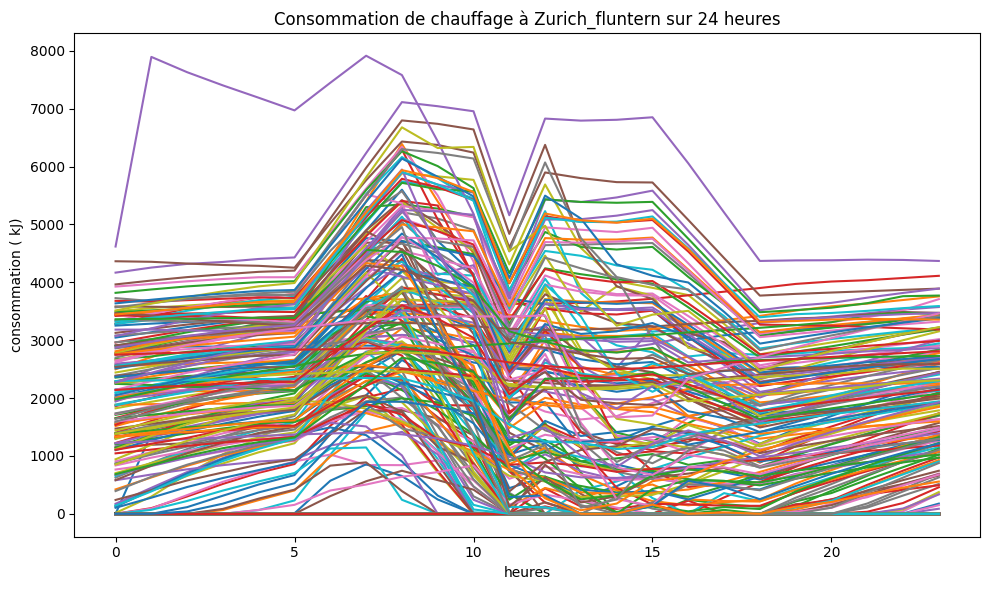

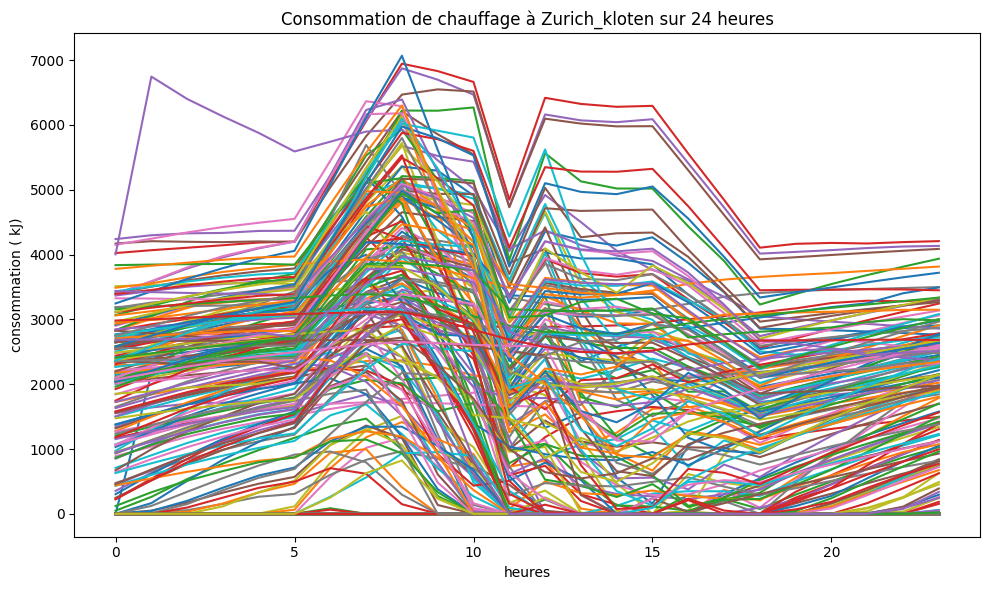

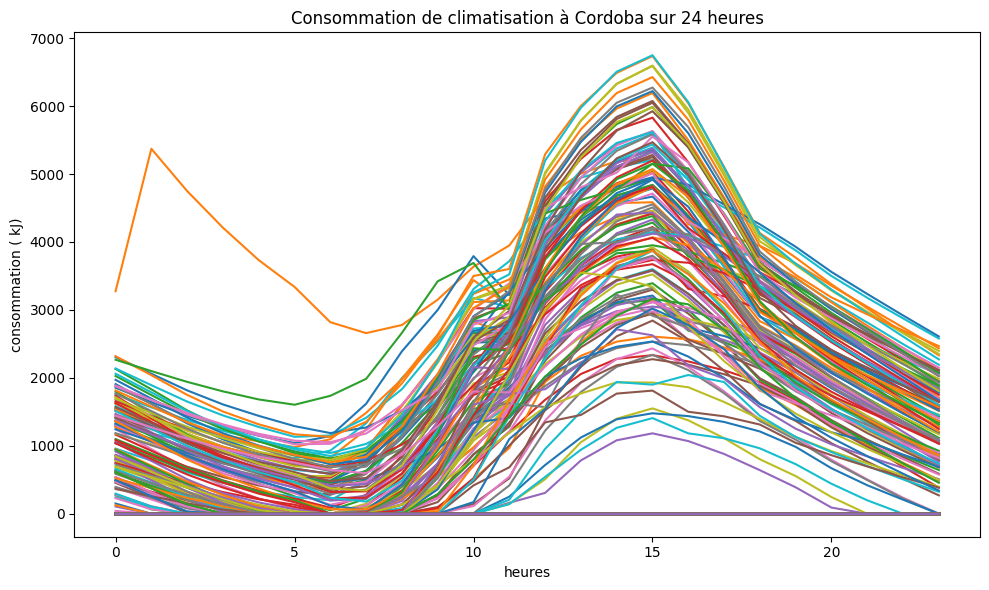

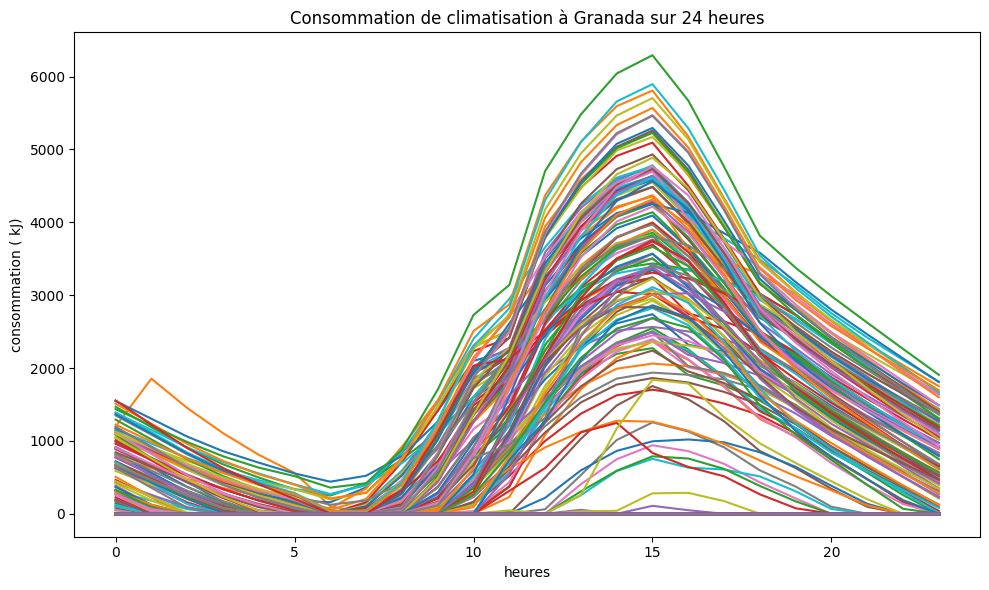

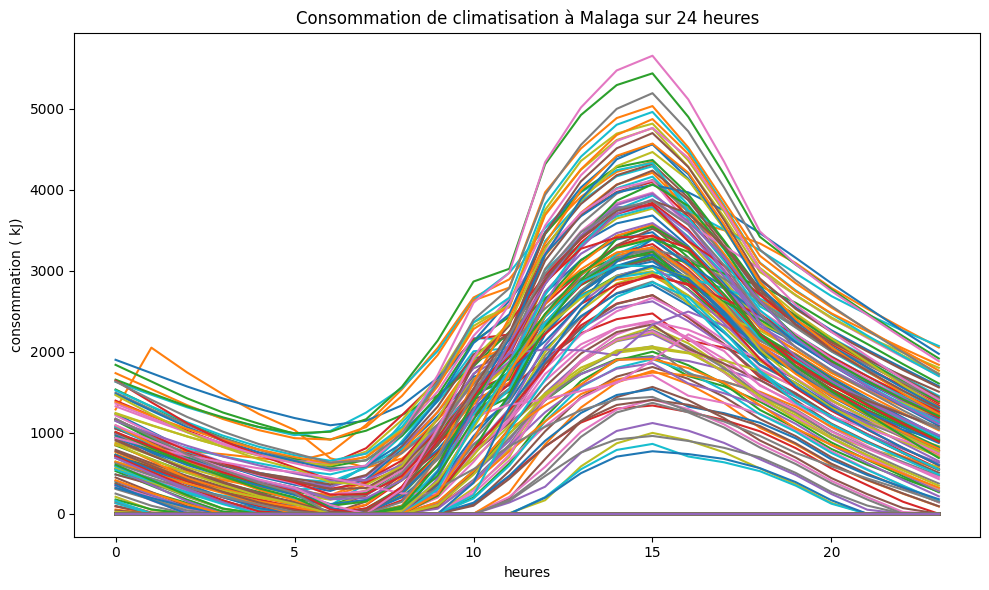

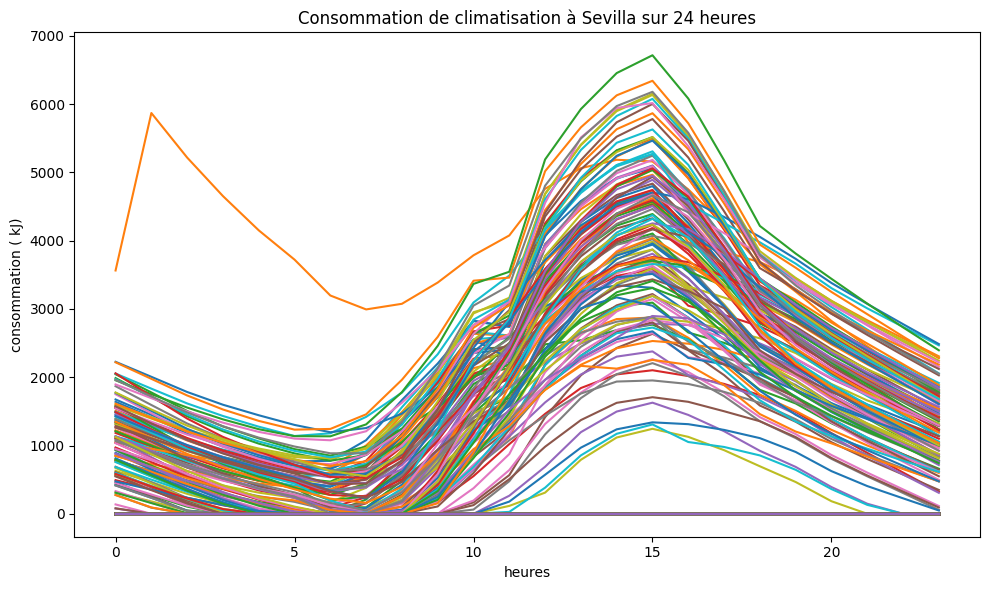

In [81]:
draw(consommation_heat_agen, "Consommation de chauffage à agen sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_albi, "Consommation de chauffage à albi sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_auch, "Consommation de chauffage à auch sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_toulouse, "Consommation de chauffage à Toulouse sur 24 heures","heures","consommation ( kJ)")

draw(consommation_heat_Birmensdorf, "Consommation de chauffage à Birmensdorf sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_Taenikon, "Consommation de chauffage à Taenikon sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_Zurich_fluntern, "Consommation de chauffage à Zurich_fluntern sur 24 heures","heures","consommation ( kJ)")
draw(consommation_heat_Zurich_kloten, "Consommation de chauffage à Zurich_kloten sur 24 heures","heures","consommation ( kJ)")

draw(consommation_cool_Cordoba, "Consommation de climatisation à Cordoba sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Granada, "Consommation de climatisation à Granada sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Malaga, "Consommation de climatisation à Malaga sur 24 heures","heures","consommation ( kJ)")
draw(consommation_cool_Sevilla, "Consommation de climatisation à Sevilla sur 24 heures","heures","consommation ( kJ)")

In [82]:
"""
Fusion des DataFrames de consommation pour chaque zone climatique : Toulouse , Zurich ,  Séville
Chaque groupe est combiné en un seul DataFrame par zone.
ex:df_combined_tou
"""

df_combined_tou = pd.concat([consommation_heat_agen, consommation_heat_albi,consommation_heat_auch,consommation_heat_toulouse], axis=0).reset_index(drop=True)
df_combined_zur = pd.concat([consommation_heat_Birmensdorf, consommation_heat_Taenikon,consommation_heat_Zurich_fluntern,consommation_heat_Zurich_kloten], axis=0).reset_index(drop=True)
df_combined_sev = pd.concat([consommation_cool_Cordoba, consommation_cool_Granada,consommation_cool_Malaga,consommation_cool_Sevilla], axis=0).reset_index(drop=True)



In [83]:
"""
Ajout d'une colonne binaire pour identifier les jours de consommation :
- '1' indique un jour "ON" (consommation > 0)
- '0' indique un jour "OFF" (consommation = 0)
ex:df_final_tou
"""
df_final_tou=add_binary_column(df_combined_tou, column_name="heat_on")
df_final_zur=add_binary_column(df_combined_zur, column_name="heat_on")
df_final_sev=add_binary_column(df_combined_sev, column_name="cool_on")

In [84]:
"""
Application de l'algorithme K-Means sur les jours de consommation de chauffage à Toulouse (jours 'ON').
Les jours sans consommation (jours 'OFF') sont automatiquement assignés au cluster 3.
"""


df_heat_tou = df_final_tou[df_final_tou["heat_on"] == 1].drop(columns=["heat_on"])
model_tou = apply_kmeans(n_clusters=3, data=df_heat_tou)
df_final_tou.loc[df_final_tou["heat_on"] == 1, "clusters"] = model_tou.labels_
df_final_tou.loc[df_final_tou["heat_on"] == 0, "clusters"] = 3

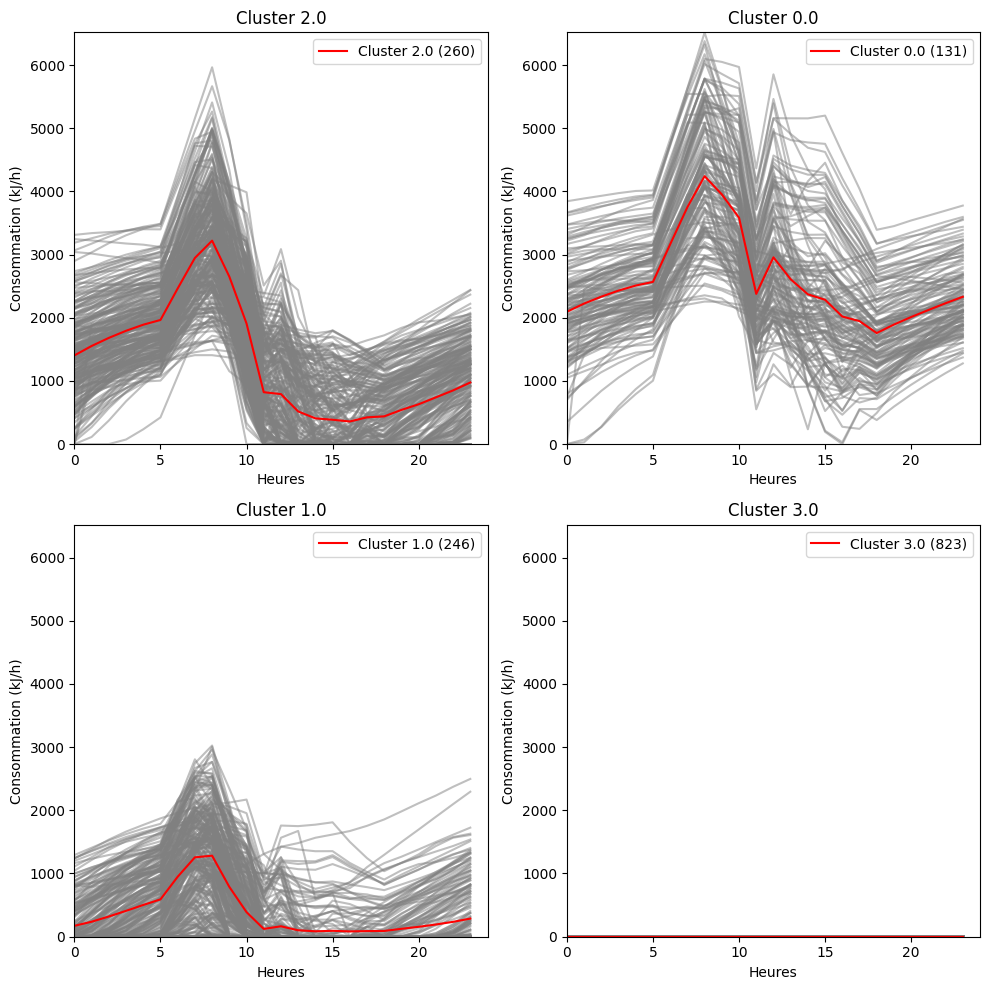

In [85]:
plot_clusters(df_final_tou.drop(columns=["heat_on"]))


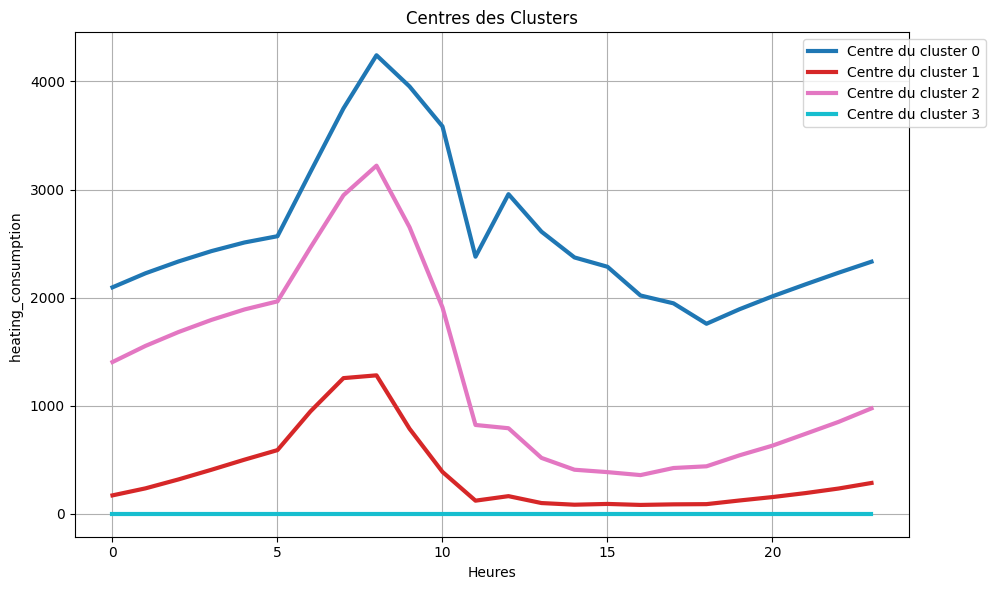

In [86]:
plot_cluster_centers_with_colors(df_final_tou.drop(columns=["heat_on"]), df_final_tou["clusters"], y_label="heating_consumption ")

In [87]:
evaluate_clustering_cooling(df_final_tou,"heat_on")

Davies-Bouldin Index: 0.9210675251335544
Silhouette Score: 0.6266800414651724


In [88]:
df_final_tou.to_csv("../data/simulation_data/conso_kmeans_data/clusters_heat_perif_toulouse_kmeans",index=False)

In [89]:
"""
Application de l'algorithme K-Means sur les jours de consommation de chauffage à zurich (jours 'ON').
Les jours sans consommation (jours 'OFF') sont automatiquement assignés au cluster 3.
"""

df_heat_zur = df_final_zur[df_final_zur["heat_on"] == 1].drop(columns=["heat_on"])
model_zur = apply_kmeans(n_clusters=3, data=df_heat_zur)
df_final_zur.loc[df_final_zur["heat_on"] == 1, "clusters"] = model_zur.labels_
df_final_zur.loc[df_final_zur["heat_on"] == 0, "clusters"] = 3

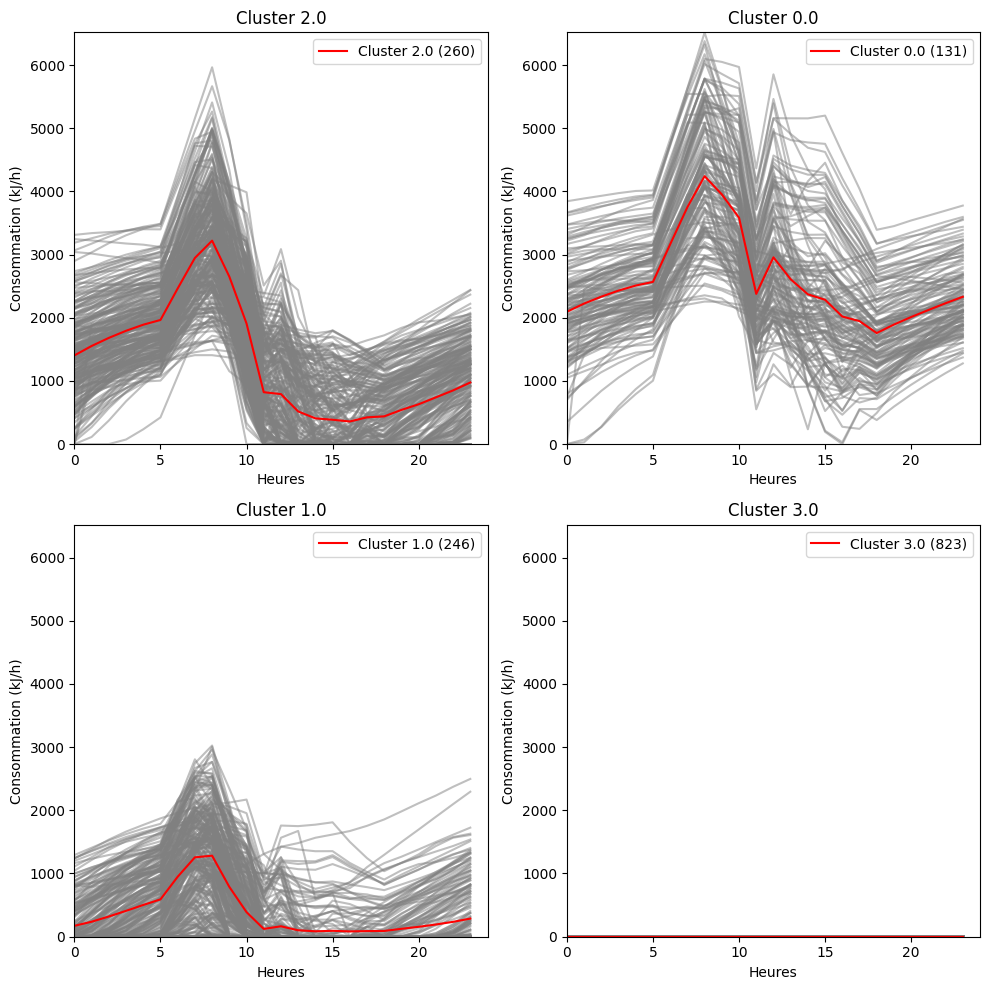

In [90]:
plot_clusters(df_final_tou.drop(columns=["heat_on"]))


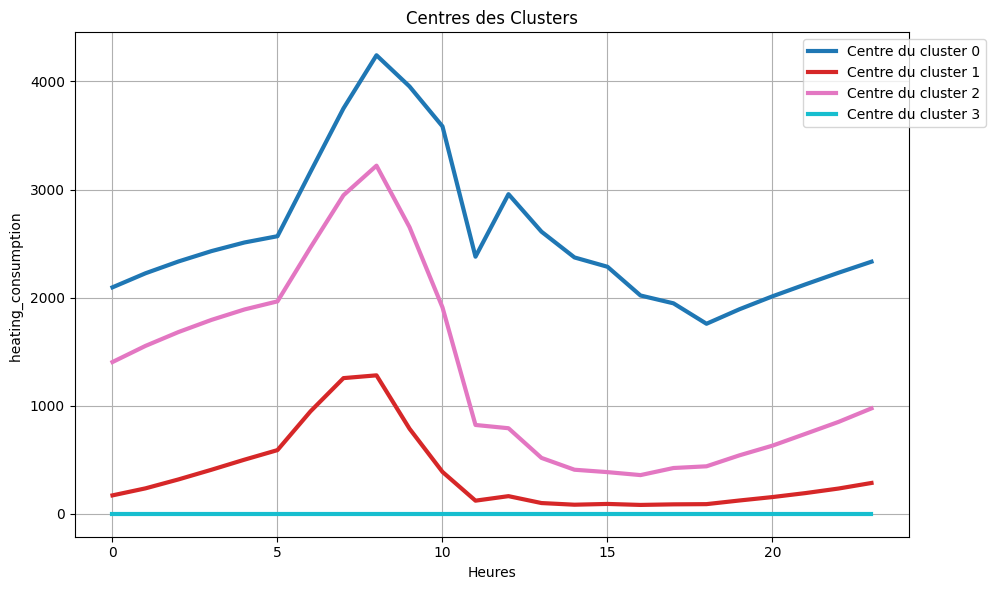

In [91]:
plot_cluster_centers_with_colors(df_final_tou.drop(columns=["heat_on"]), df_final_tou["clusters"], y_label="heating_consumption ")

In [92]:
evaluate_clustering_cooling(df_final_zur,"heat_on")

Davies-Bouldin Index: 0.8654392523449994
Silhouette Score: 0.6353605238032672


In [93]:
df_final_zur.to_csv("../data/simulation_data/conso_kmeans_data/clusters_heat_perif_zurich_kmeans",index=False)

In [94]:
"""
Application de l'algorithme K-Means sur les jours de consommation de climatisation  à seville (jours 'ON').
Les jours sans consommation (jours 'OFF') sont automatiquement assignés au cluster 3.
"""

df_cool_sev = df_final_sev[df_final_sev["cool_on"] == 1].drop(columns=["cool_on"])
model_sev = apply_kmeans(n_clusters=3, data=df_cool_sev)
df_final_sev.loc[df_final_sev["cool_on"] == 1, "clusters"] = model_sev.labels_
df_final_sev.loc[df_final_sev["cool_on"] == 0, "clusters"] = 3

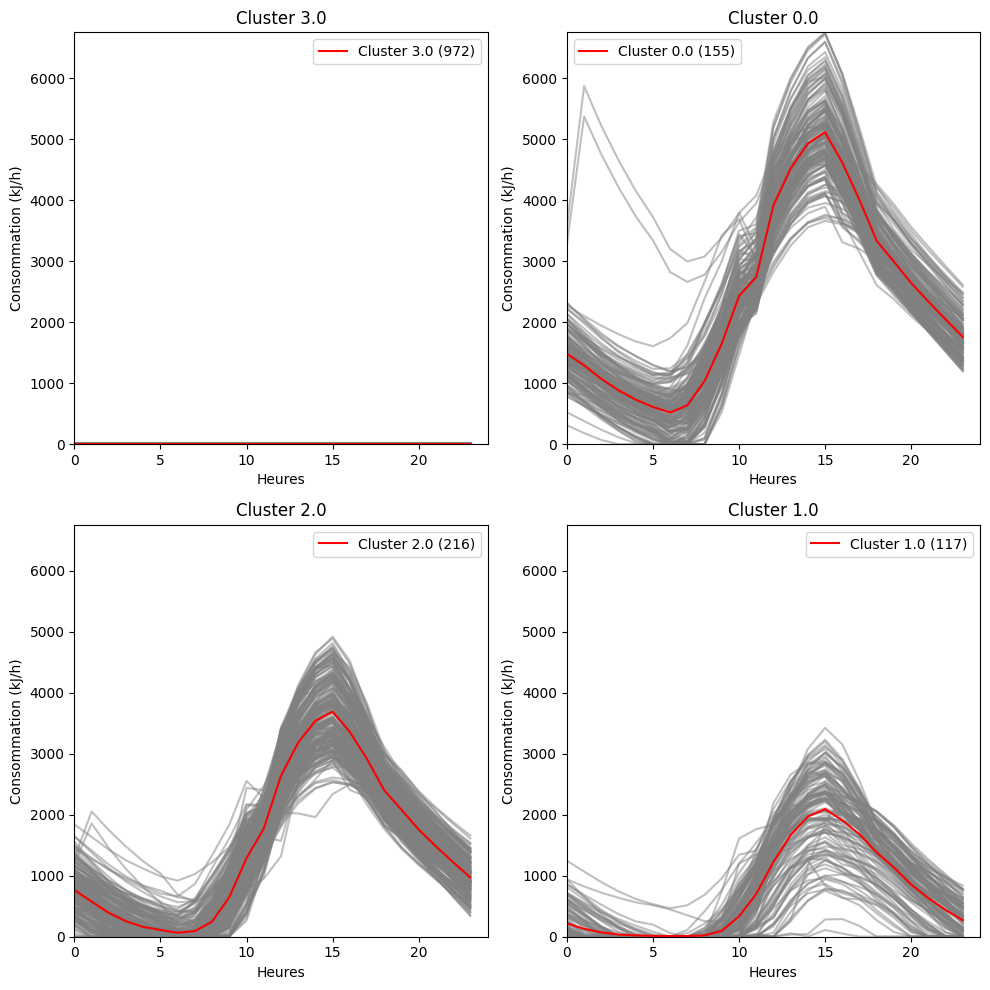

In [95]:
plot_clusters(df_final_sev.drop(columns=["cool_on"]))


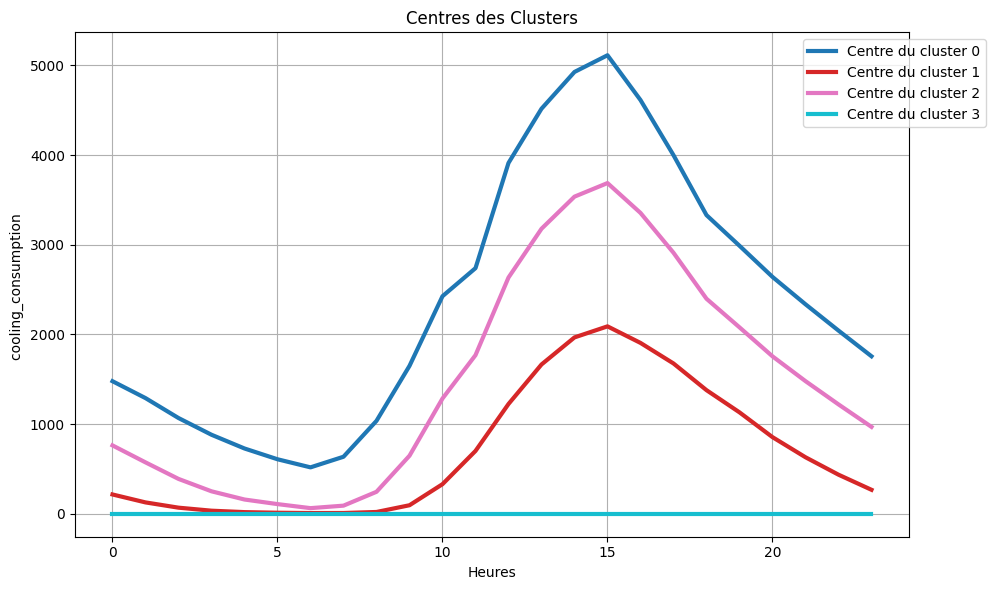

In [96]:
plot_cluster_centers_with_colors(df_final_sev.drop(columns=["cool_on"]), df_final_sev["clusters"], y_label="cooling_consumption ")

In [97]:
evaluate_clustering_cooling(df_final_sev,"cool_on")

Davies-Bouldin Index: 0.6578695814432312
Silhouette Score: 0.7901285696483455


In [98]:
df_final_sev.to_csv("../data/simulation_data/conso_kmeans_data/clusters_cool_perif_seville_kmeans",index=False)

In [100]:
"""
Calcul de MAE, MSE et RMSE pour les clusters de consommation de chauffage à Toulouse et sa périphérie
"""


cluster_centers = model_tou.cluster_centers_
zero_center = np.zeros(cluster_centers.shape[1])  
cluster_centers = np.vstack([cluster_centers, zero_center])
centers_df_conso = pd.DataFrame(cluster_centers, columns=df_heat_tou.columns)

cluster_centers = centers_df_conso.values
metrics = []

for cluster_id in range(4):  
    cluster_data2 = df_final_tou[df_final_tou["clusters"] == cluster_id].drop(columns=["heat_on", "clusters"])
    cluster_center2 = cluster_centers[cluster_id]
    mse_total, mae_total, rmse_total = 0, 0, 0

    for i, row in cluster_data2.iterrows():
        mse, mae, rmse = calculate_metrics(row.values, cluster_center2)
        mse_total += mse
        mae_total += mae
        rmse_total += rmse
    

    num_series = len(cluster_data2)
    mse_total /= num_series
    mae_total /= num_series
    rmse_total /= num_series

    metrics.append({
        "cluster_id": cluster_id,
        "mse": mse_total,
        "mae": mae_total,
        "rmse": rmse_total
    })

metrics_df = pd.DataFrame(metrics)
avg_metrics = metrics_df[['mse', 'mae', 'rmse']].mean()
print(metrics_df)
print("\nMoyennes des métriques")
print(avg_metrics)

   cluster_id            mse         mae        rmse
0           0  603408.925962  611.896429  720.952737
1           1  199245.959672  323.815347  415.322014
2           2  388050.258334  514.256998  596.241737
3           3       0.000000    0.000000    0.000000

Moyennes des métriques
mse     297676.285992
mae        362.492194
rmse       433.129122
dtype: float64
